In [1]:
import keras
keras.__version__

'2.8.0'

**Imoporting Dataset**

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

In [5]:
max([max(sequence) for sequence in train_data])

9999

## Preparing the data

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorizing the labels

In [8]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the network

Implementing Keras

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validating the approach

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training the model for 20 epochs, in mini-batches of 512 
samples.

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 35ms/step - loss: 0.4937 - binary_accuracy: 0.8013 - val_loss: 0.3788 - val_binary_accuracy: 0.8665
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2939 - binary_accuracy: 0.9064 - val_loss: 0.2989 - val_binary_accuracy: 0.8898
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2180 - binary_accuracy: 0.9285 - val_loss: 0.2849 - val_binary_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1728 - binary_accuracy: 0.9423 - val_loss: 0.2863 - val_binary_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1390 - binary_accuracy: 0.9557 - val_loss: 0.2842 - val_binary_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1130 - binary_accuracy: 0.9651 - val_loss: 0.2992 - val_binary_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - los

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

Using Matplotlib to plot the 
training and validation loss side by side, as well as the training and validation accuracy:

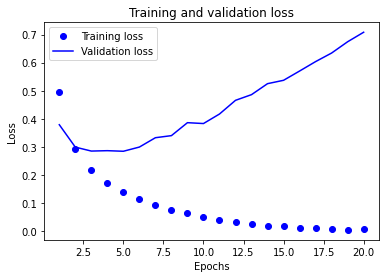

In [16]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

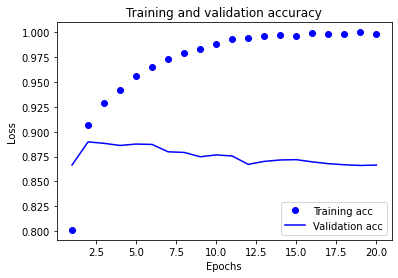

In [17]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The dots are the training loss and accuracy, while the solid lines are the validation loss and accuracy.The training loss decreases with every epoch and the training accuracy increases with every epoch, But that isn't the case for the validation loss and accuracy.

In [18]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=4, batch_size=512)
results1 = model1.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4704 - accuracy: 0.8208
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2621 - accuracy: 0.9103
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1996 - accuracy: 0.9291
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2949 - accuracy: 0.8848


In [19]:
results1

[0.29488927125930786, 0.8848400115966797]

## Using a trained network to generate predictions on new data

In [20]:
model1.predict(x_test)

array([[0.16609219],
       [0.99995875],
       [0.8871399 ],
       ...,
       [0.09867929],
       [0.07836569],
       [0.6572852 ]], dtype=float32)

**Question 1.** You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

In [21]:
model2 = keras.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=4, batch_size=512)
results2 = model2.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4588 - accuracy: 0.8215
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2521 - accuracy: 0.9112
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1961 - accuracy: 0.9295
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3022 - accuracy: 0.8831


In [22]:
results2

[0.3022139072418213, 0.883080005645752]

**Question 2.** Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so 
on.   

In [23]:
model3 = keras.Sequential()
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model3.fit(x_train, y_train, epochs=3, batch_size=512)
results3 = model3.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 9ms/step - loss: 0.4306 - accuracy: 0.8153
Epoch 2/3
49/49 [==============================] - 0s 9ms/step - loss: 0.2397 - accuracy: 0.9138
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.3469 - accuracy: 0.8633


In [24]:
results3

[0.34694987535476685, 0.8632799983024597]

**Question 3**. Try using the mse loss function instead of binary_crossentropy.  

In [25]:
model4 = keras.Sequential()
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model4.fit(x_train, y_train, epochs=3, batch_size=512)
results4 = model4.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 9ms/step - loss: 0.1467 - accuracy: 0.8272
Epoch 2/3
49/49 [==============================] - 0s 8ms/step - loss: 0.0789 - accuracy: 0.9102
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.0872 - accuracy: 0.8828


In [26]:
results4

[0.08722622692584991, 0.8827599883079529]

**Question 4**. Try using the tanh activation (an activation that was popular in the early days of neural 
networks) instead of relu. 

In [27]:
model5 = keras.Sequential()
model5.add(layers.Dense(16, activation='tanh'))
model5.add(layers.Dense(16, activation='tanh'))
model5.add(layers.Dense(1, activation='sigmoid'))

model5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model5.fit(x_train, y_train, epochs=3, batch_size=512)
results5 = model5.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 9ms/step - loss: 0.4439 - accuracy: 0.8352
Epoch 2/3
49/49 [==============================] - 0s 9ms/step - loss: 0.2494 - accuracy: 0.9138
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2872 - accuracy: 0.8845


In [28]:
results5

[0.28716957569122314, 0.8844799995422363]

**Question 5.** Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation

In [29]:
from tensorflow.keras import regularizers
model6_Dropout = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model6_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model6_Dropout = model6_Dropout.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history6_dict_Dropout = history_model6_Dropout.history
history6_dict_Dropout.keys()

Epoch 1/20
49/49 [==============================] - 2s 22ms/step - loss: 0.5639 - accuracy: 0.7123 - val_loss: 0.3642 - val_accuracy: 0.8983
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3743 - accuracy: 0.8608 - val_loss: 0.2396 - val_accuracy: 0.9228
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2833 - accuracy: 0.9010 - val_loss: 0.2147 - val_accuracy: 0.9122
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2367 - accuracy: 0.9184 - val_loss: 0.1478 - val_accuracy: 0.9528
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1945 - accuracy: 0.9321 - val_loss: 0.1239 - val_accuracy: 0.9630
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1694 - accuracy: 0.9429 - val_loss: 0.1002 - val_accuracy: 0.9699
Epoch 7/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1468 - accuracy: 0.9498 - val_loss: 0.0847 - val_accuracy: 0.9758
Epoch 8/20
49

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

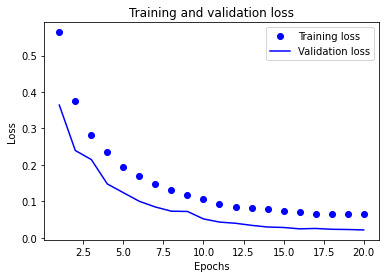

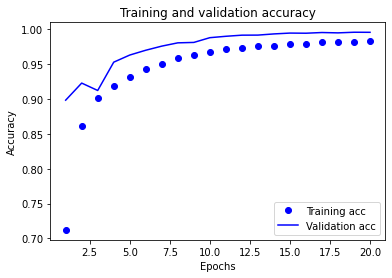

In [30]:
import matplotlib.pyplot as plt
loss_value6 = history6_dict_Dropout["loss"]
val_loss_value6 = history6_dict_Dropout["val_loss"]
epochs = range(1, len(loss_value6) + 1)
plt.plot(epochs, loss_value6, "bo", label="Training loss")
plt.plot(epochs, val_loss_value6, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history6_dict_Dropout["accuracy"]
val_acc = history6_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
model6_Dropout.fit(x_train, y_train, epochs=3, batch_size=512)
results6 = model6_Dropout.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 0s 10ms/step - loss: 0.0641 - accuracy: 0.9824
Epoch 2/3
49/49 [==============================] - 0s 10ms/step - loss: 0.0627 - accuracy: 0.9839
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.7649 - accuracy: 0.8702


In [32]:
results6

[0.7648531794548035, 0.870199978351593]

**Summary**

In [33]:
import numpy
all_Loss= numpy.array([results6[0],results5[0],results4[0],results3[0],results2[0]])*100
all_Loss
all_Accuracy= numpy.array([results6[1],results5[1],results4[1],results3[1],results2[1]])*100
all_Accuracy
Labels=['Model6_Dropout','Model5','Model4','model3','model2']

plt.clf()

<Figure size 432x288 with 0 Axes>

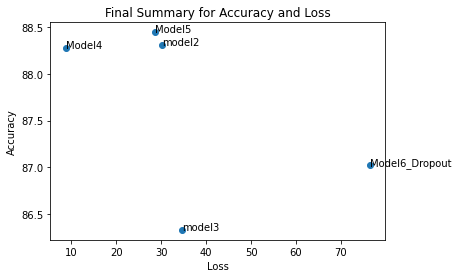

In [34]:
fig, ax = plt.subplots()
ax.scatter(all_Loss,all_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (all_Loss[i],all_Accuracy[i] ))
plt.title("Final Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

Model 5 has the maximum accuracy,where we used 2 dense layer of 16,16. When we The model where MSE was used has the minimum loss.
When we increased the number of hidden layers both accuracy and loss were increased.
When we increased layers with more hidden units there was a significant increase in loss whereas the accuracy had a minimal impact. 